<a href="https://colab.research.google.com/github/Yehhmii/100dayspy4/blob/main/Day73Most_Popular_PL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [ ]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

In [ ]:
df.shape

(1991, 3)

In [ ]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [ ]:
df.count()

,0
DATE,1991
TAG,1991
POSTS,1991


In [ ]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,65286


In [ ]:
highest = df.groupby('TAG').sum()
highest['POSTS'].idxmax()

'javascript'

In [ ]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [ ]:
low_month = df.groupby('TAG').count()
low_month['POSTS'].idxmin()

'go'

In [ ]:
df.DATE[1]

'2008-08-01 00:00:00'

In [ ]:
type(pd.to_datetime(df.DATE[1]))

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# convert the entire date to datetime obj
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [ ]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.shape

(145, 14)

In [ ]:
reshaped_df.fillna(0, inplace=True)

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [ ]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [ ]:
reshaped_df.count()

,0
TAG,
assembly,145
c,145
c#,145
c++,145
delphi,145
go,145
java,145
javascript,145
perl,145


In [ ]:
reshaped_df.isna().values.any()

np.False_

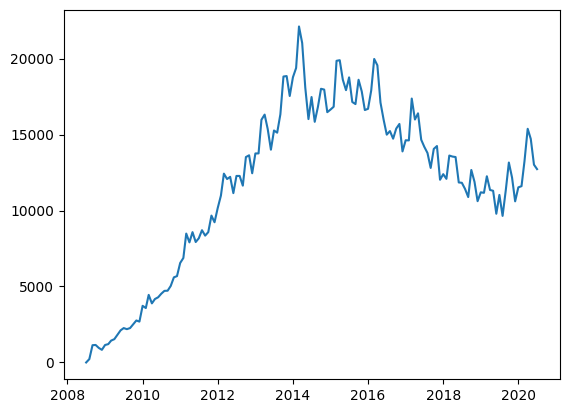

In [ ]:
import matplotlib.pyplot as plt
plt.plot(reshaped_df.index, reshaped_df['java'])

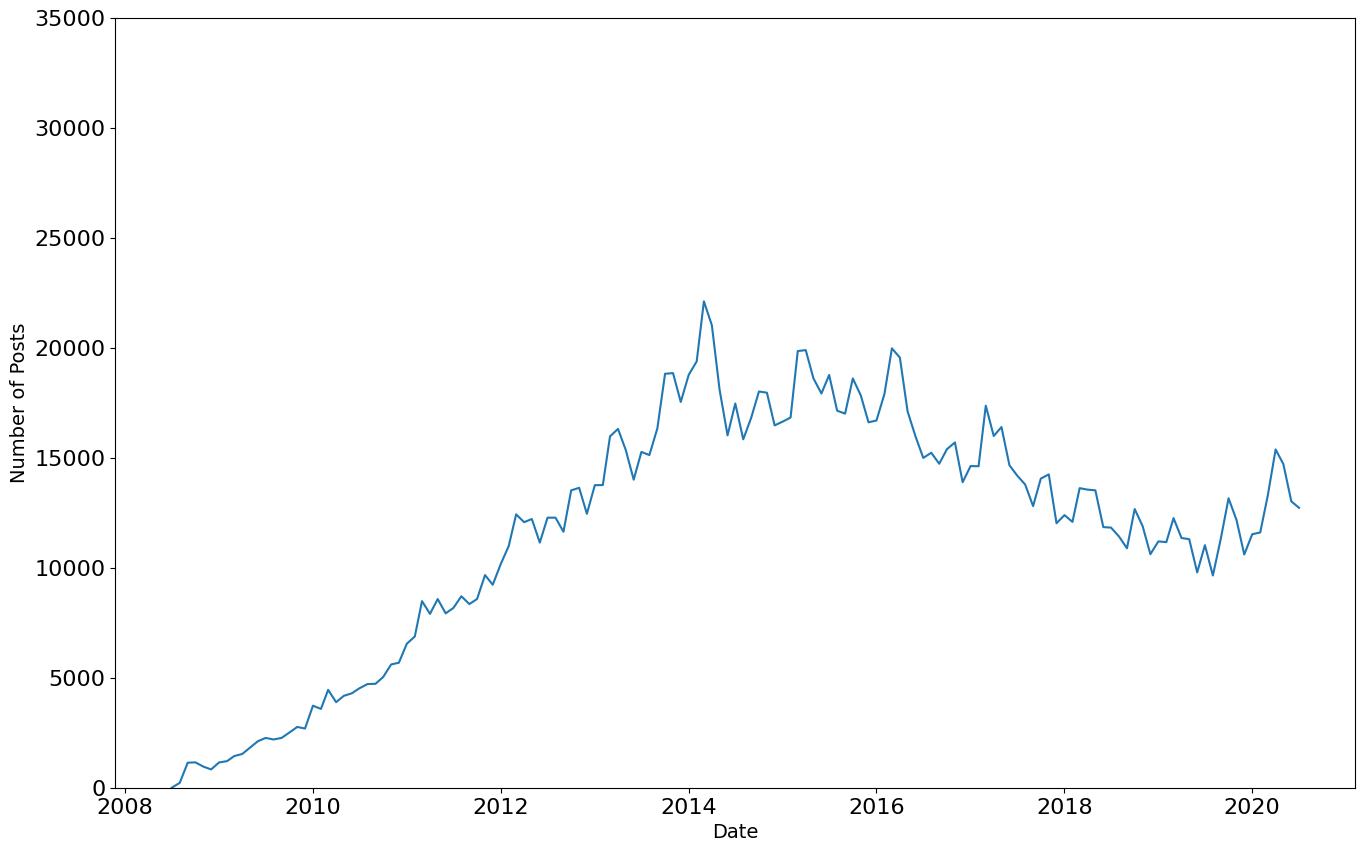

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])

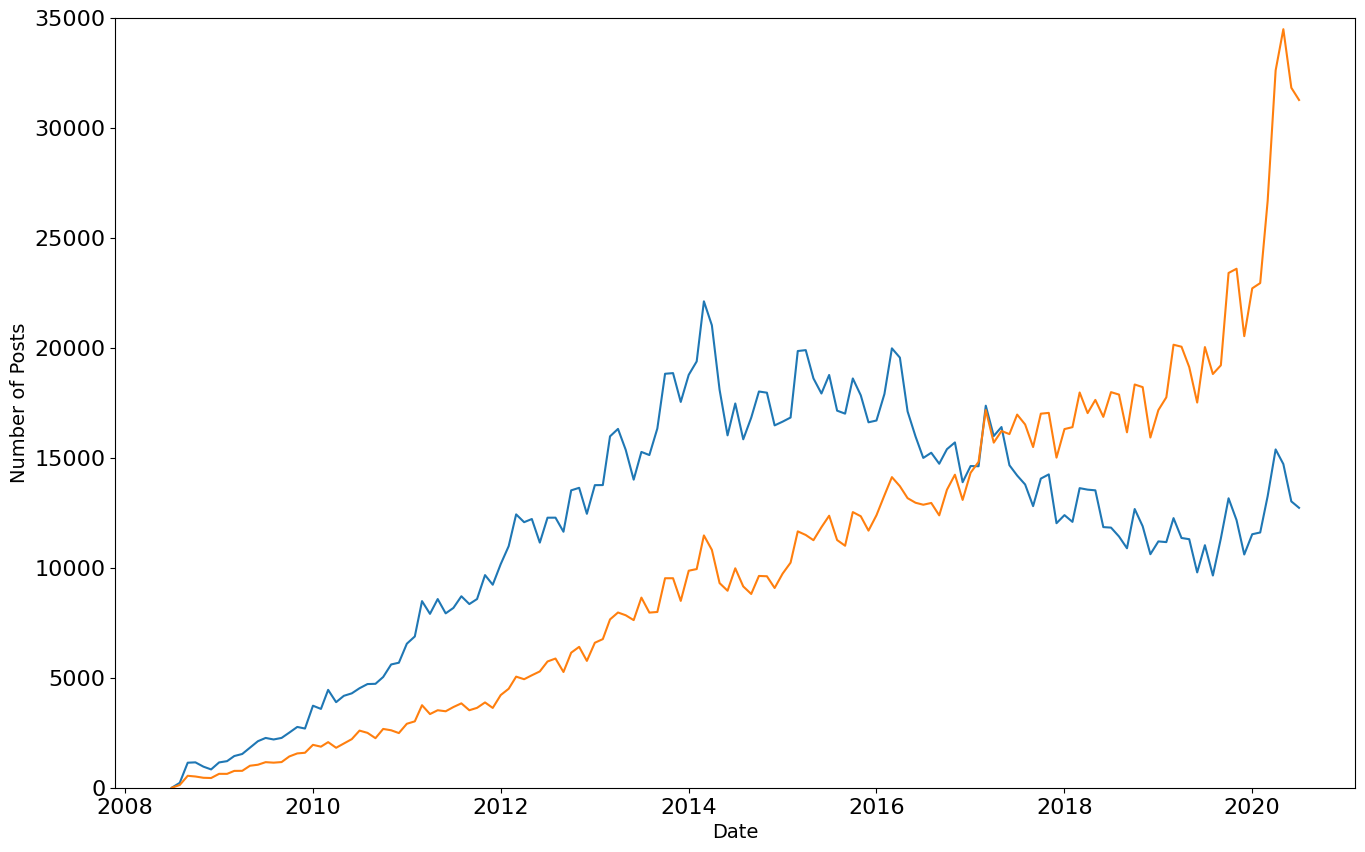

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df.python)

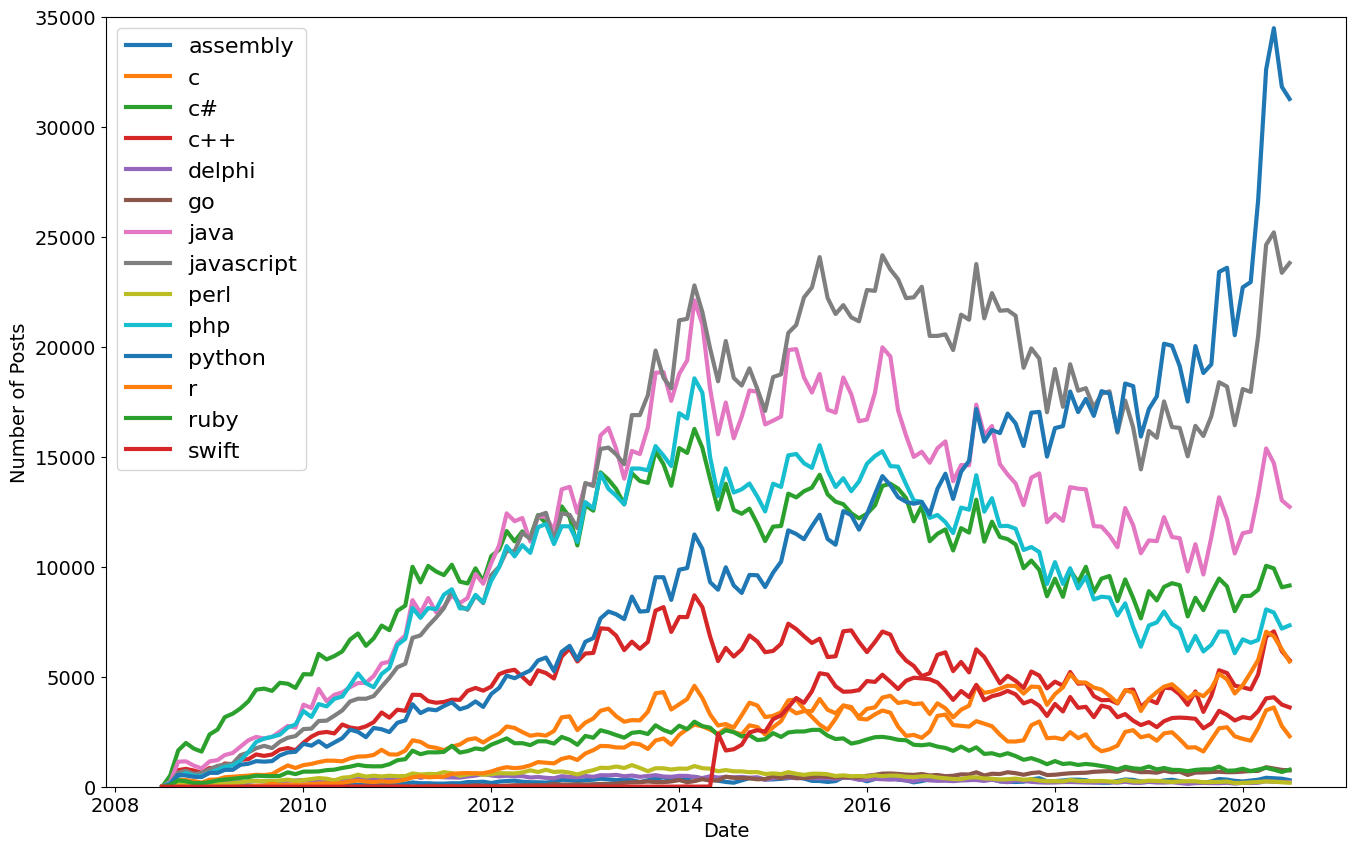

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

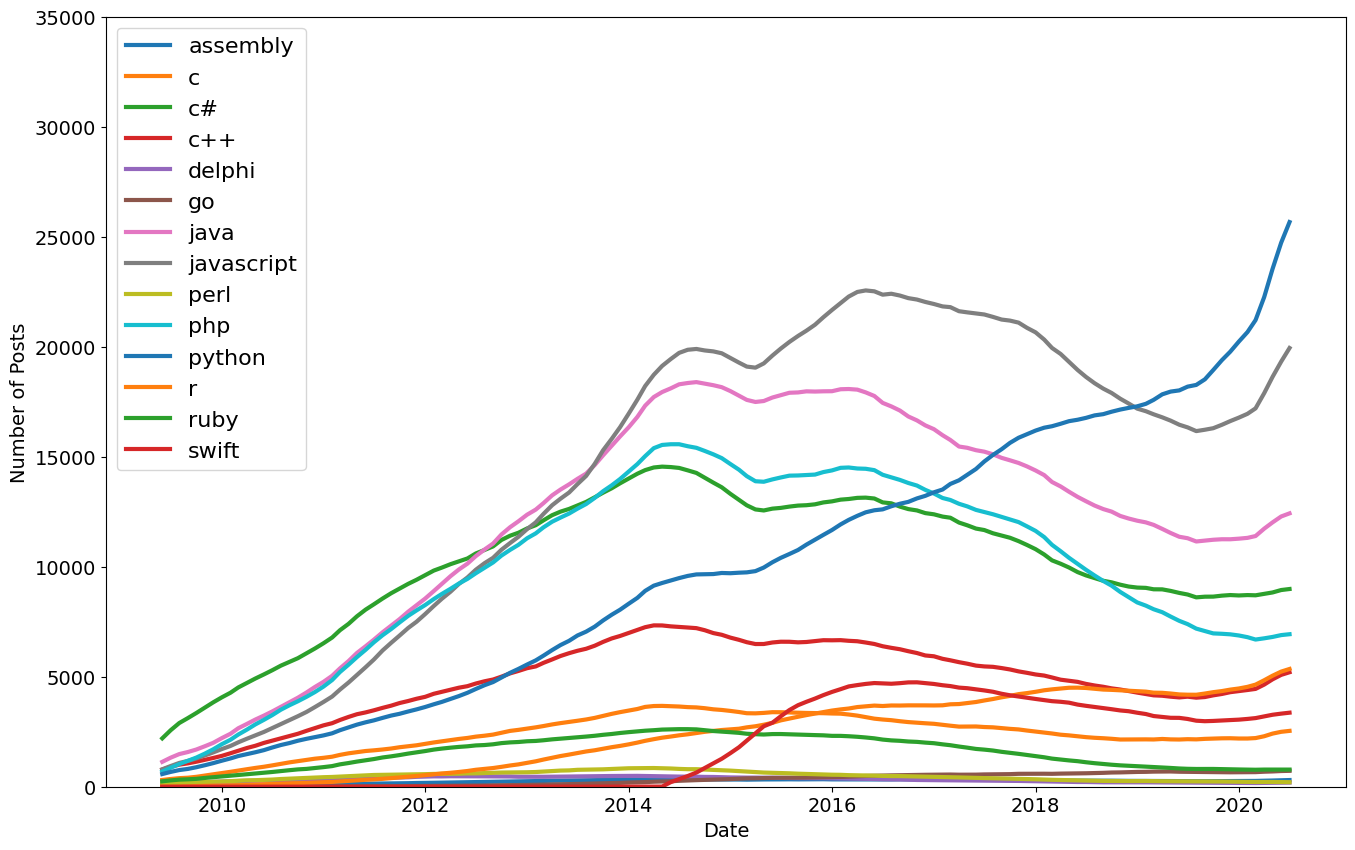

In [ ]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

<ipython-input-58-a61f6a4c1444>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


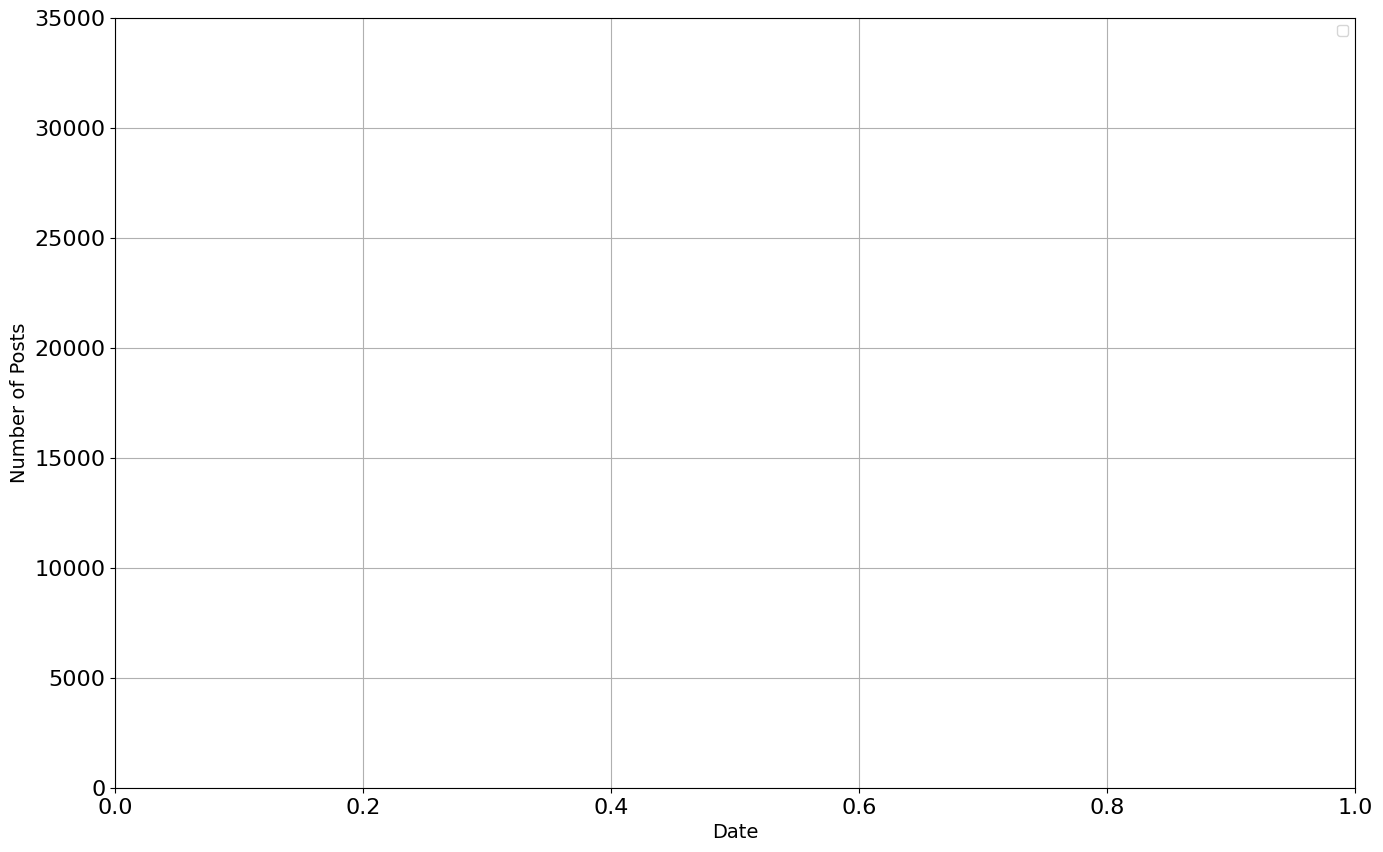

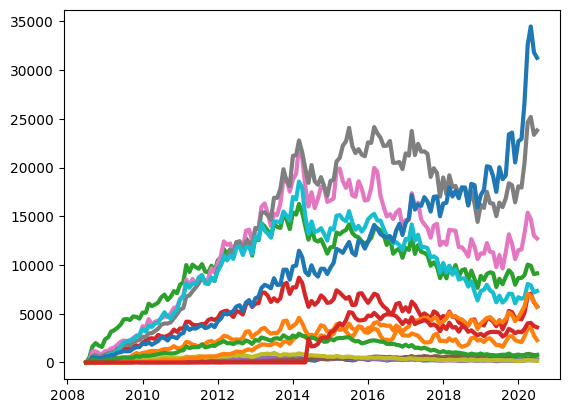

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.legend()
plt.grid(True)
plt.show()
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)


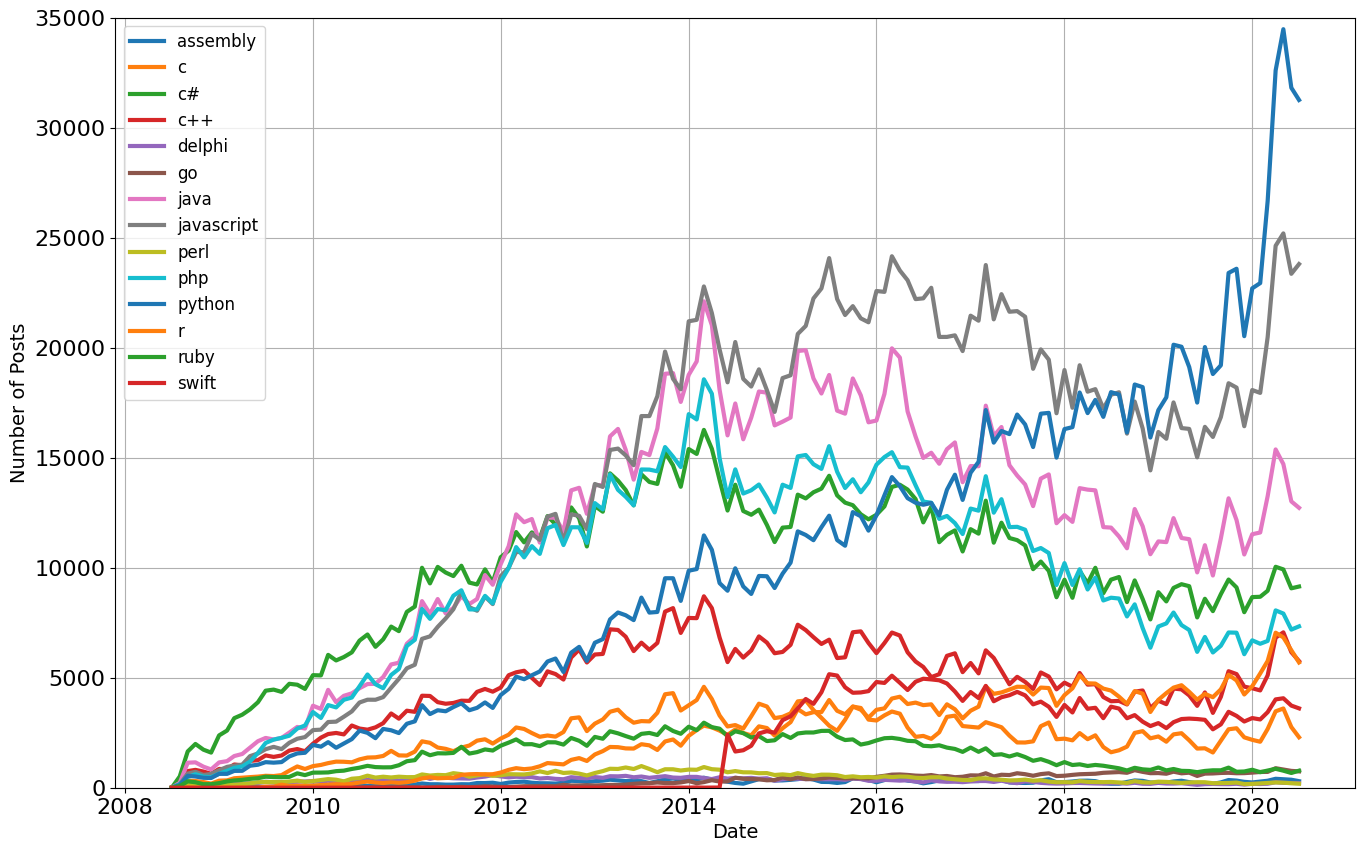

In [ ]:
plt.figure(figsize=(16,10))

# Plot all lines FIRST
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index,
             reshaped_df[column],
             linewidth=3,
             label=column)  # Use column name directly as label

# THEN add the legend and other elements
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.legend(fontsize=12)  # Now this will show all plotted lines
plt.grid(True)
plt.show()  # Show everything together